In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import GRU
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error
import time

Using TensorFlow backend.
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(0)

In [4]:
# 데이터 불러오기
dataset = pd.read_csv(r'region_daily.csv', encoding = 'EUC-KR')  

In [5]:
dataset.head()

,구분,경남
0,2008년04월15일,1674.62
1,2008년04월16일,1680.75
2,2008년04월17일,1679.82
3,2008년04월18일,1681.93
4,2008년04월19일,1685.71


In [6]:
# 필요한 부분만 불러오기
dataset = dataset.iloc[:, 1:2].values  

In [7]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

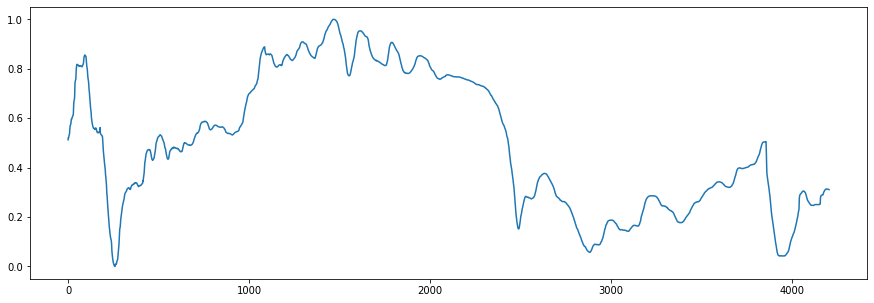

In [8]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset)
plt.show()

In [9]:
dataset

array([[0.51261729],
       [0.52059501],
       [0.51938469],
       ...,
       [0.31161259],
       [0.31107901],
       [0.31083174]])

In [10]:
seq_len = 10
sequence_length = seq_len + 1

result = []
for index in range(len(dataset) - sequence_length):
    result.append(dataset[index: index + sequence_length])

In [11]:
normalized_data = []
for window in result:
    try:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    except ZeroDivisionError:
        pass

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.7))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((2935, 10, 1), (1258, 10, 1))

In [12]:
model = Sequential()

model.add(LSTM(30, return_sequences=True, input_shape=(10, 1)))
# model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 30)            3840      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


In [13]:
start = time.time()

In [14]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=30,
    epochs=100)


Train on 2935 samples, validate on 1258 samples
Epoch 1/100
2935/2935 [==============================] - 2s 515us/step - loss: 2.5215 - val_loss: 0.0029
Epoch 2/100
2935/2935 [==============================] - 1s 262us/step - loss: 2.1678 - val_loss: 0.0014
Epoch 3/100
2935/2935 [==============================] - 1s 251us/step - loss: 2.0232 - val_loss: 0.0012
Epoch 4/100
2935/2935 [==============================] - 1s 272us/step - loss: 1.9349 - val_loss: 0.0025
Epoch 5/100
2935/2935 [==============================] - 1s 253us/step - loss: 1.8822 - val_loss: 0.0018
Epoch 6/100
2935/2935 [==============================] - 1s 259us/step - loss: 1.8097 - val_loss: 0.0016
Epoch 7/100
2935/2935 [==============================] - 1s 258us/step - loss: 1.7753 - val_loss: 6.4519e-04
Epoch 8/100
2935/2935 [==============================] - 1s 253us/step - loss: 1.7126 - val_loss: 5.7351e-04
Epoch 9/100
2935/2935 [==============================] - 1s 277us/step - loss: 1.6692 - val_loss: 0.001

Epoch 74/100
2935/2935 [==============================] - 1s 250us/step - loss: 0.5109 - val_loss: 7.5781e-04
Epoch 75/100
2935/2935 [==============================] - 1s 245us/step - loss: 0.4514 - val_loss: 5.2750e-04
Epoch 76/100
2935/2935 [==============================] - 1s 242us/step - loss: 0.4380 - val_loss: 0.0013
Epoch 77/100
2935/2935 [==============================] - 1s 243us/step - loss: 0.4149 - val_loss: 1.6504e-04
Epoch 78/100
2935/2935 [==============================] - 1s 246us/step - loss: 0.4061 - val_loss: 2.6040e-04
Epoch 79/100
2935/2935 [==============================] - 1s 246us/step - loss: 0.3823 - val_loss: 5.2217e-04
Epoch 80/100
2935/2935 [==============================] - 1s 244us/step - loss: 0.3670 - val_loss: 5.5053e-04
Epoch 81/100
2935/2935 [==============================] - 1s 242us/step - loss: 0.3525 - val_loss: 2.0635e-04
Epoch 82/100
2935/2935 [==============================] - 1s 255us/step - loss: 0.3424 - val_loss: 2.2615e-04
Epoch 83/100
2

In [15]:
end = time.time()
total = end-start

print(total)

76.24938917160034


<function matplotlib.pyplot.show(*args, **kw)>

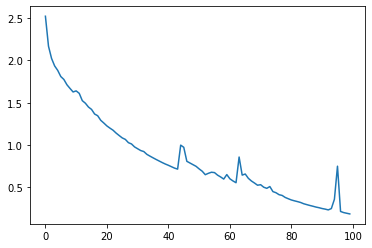

In [16]:
plt.plot(model.history.history['loss'])
plt.show

In [17]:
trainPredict = model.predict(x_train)

start = time.time()
testPredict = model.predict(x_test)
end = time.time()
total = end-start

print(total)

0.07395768165588379


In [18]:
testPredict2 = scaler.inverse_transform(testPredict) 

In [19]:
y_test2=scaler.inverse_transform([y_test])

In [20]:
mse = 0
for i in range(len(testPredict2)):
    mse = mse+(testPredict2[i]-y_test2[0][i])**2
mse = mse/len(y_test2[0])
mse

array([86.26877], dtype=float32)

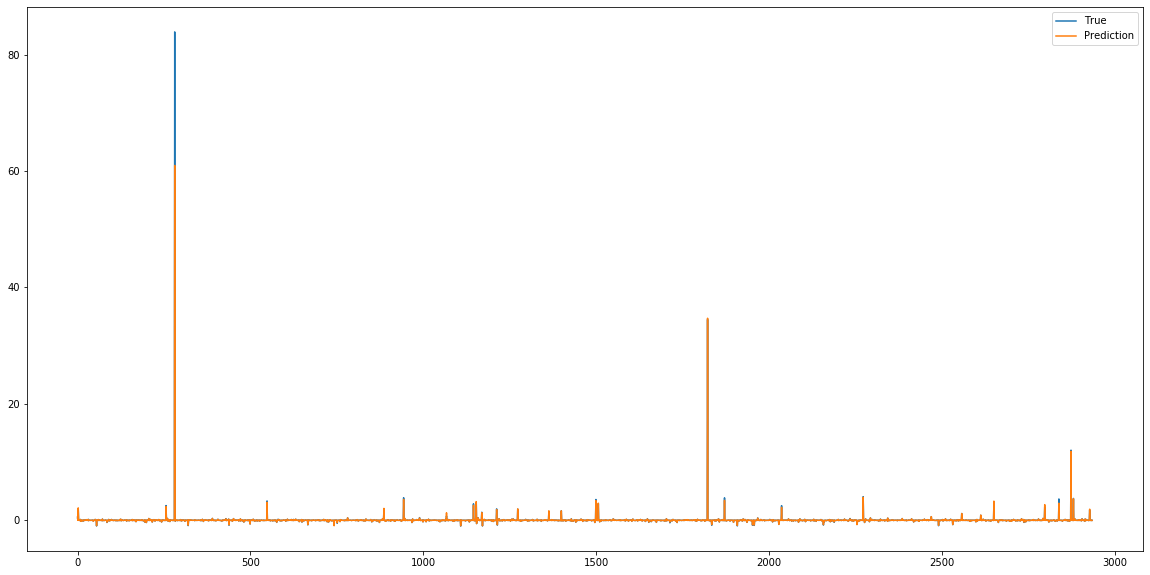

In [21]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_train, label='True')
ax.plot(trainPredict, label='Prediction')
ax.legend()
plt.show()

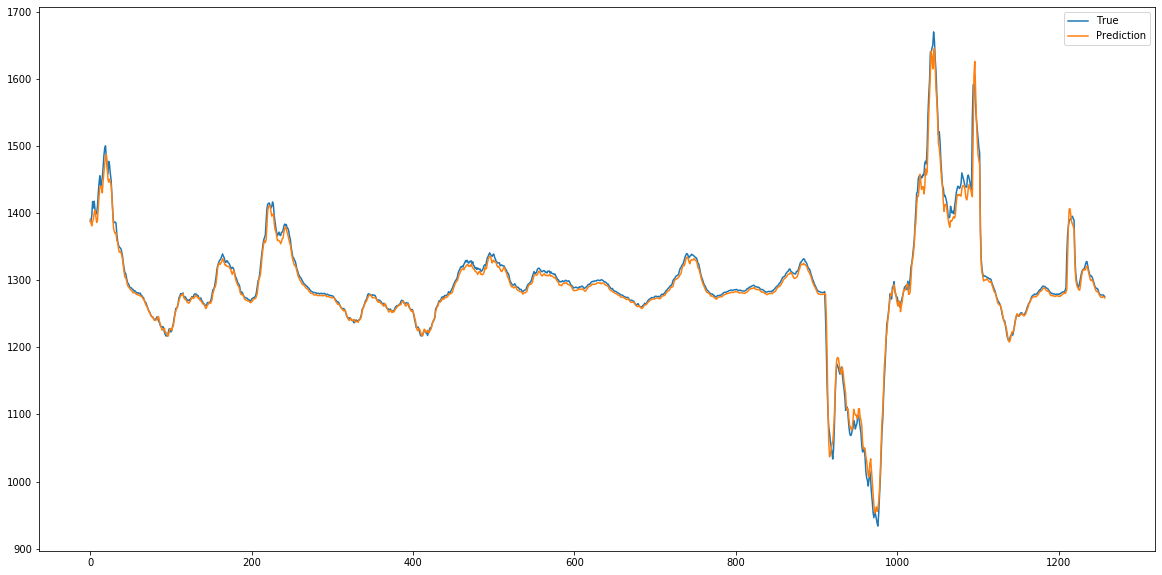

In [22]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test2[0], label='True')
ax.plot(testPredict2, label='Prediction')
ax.legend()
plt.show()

In [23]:
# 데이터 불러오기
dataset = pd.read_csv(r'region_daily.csv', encoding = 'EUC-KR')  

In [24]:
# 필요한 부분만 불러오기
dataset = dataset.iloc[:, 1:2].values  

In [25]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [26]:
seq_len = 10
sequence_length = seq_len + 1

result = []
for index in range(len(dataset) - sequence_length):
    result.append(dataset[index: index + sequence_length])

In [27]:
normalized_data = []
for window in result:
    try:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    except ZeroDivisionError:
        pass

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.7))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((2935, 10, 1), (1258, 10, 1))

In [28]:
model = Sequential()

model.add(GRU(30, return_sequences=True, input_shape=(10, 1)))
# model.add(Dropout(0.2))

model.add(GRU(64, return_sequences=False))
# model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10, 30)            2880      
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                18240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 21,185
Trainable params: 21,185
Non-trainable params: 0
_________________________________________________________________


In [29]:
start = time.time()

In [30]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=30,
    epochs=100)

Train on 2935 samples, validate on 1258 samples
Epoch 1/100
2935/2935 [==============================] - 2s 561us/step - loss: 2.8327 - val_loss: 5.3617e-04
Epoch 2/100
2935/2935 [==============================] - 1s 273us/step - loss: 2.4370 - val_loss: 0.0044
Epoch 3/100
2935/2935 [==============================] - 1s 268us/step - loss: 2.1465 - val_loss: 4.6887e-04
Epoch 4/100
2935/2935 [==============================] - 1s 290us/step - loss: 1.9795 - val_loss: 3.9463e-04
Epoch 5/100
2935/2935 [==============================] - 1s 274us/step - loss: 1.9099 - val_loss: 0.0024
Epoch 6/100
2935/2935 [==============================] - 1s 280us/step - loss: 1.8444 - val_loss: 4.2636e-04
Epoch 7/100
2935/2935 [==============================] - 1s 263us/step - loss: 1.7904 - val_loss: 9.3763e-04
Epoch 8/100
2935/2935 [==============================] - 1s 265us/step - loss: 1.7451 - val_loss: 9.0450e-04
Epoch 9/100
2935/2935 [==============================] - 1s 288us/step - loss: 1.6956 - 

Epoch 76/100
2935/2935 [==============================] - 1s 265us/step - loss: 0.3371 - val_loss: 6.3429e-05
Epoch 77/100
2935/2935 [==============================] - 1s 265us/step - loss: 0.3141 - val_loss: 2.6755e-04
Epoch 78/100
2935/2935 [==============================] - 1s 265us/step - loss: 0.3107 - val_loss: 2.4068e-04
Epoch 79/100
2935/2935 [==============================] - 1s 266us/step - loss: 0.3216 - val_loss: 6.8700e-05
Epoch 80/100
2935/2935 [==============================] - 1s 264us/step - loss: 0.2885 - val_loss: 4.4419e-04
Epoch 81/100
2935/2935 [==============================] - 1s 258us/step - loss: 0.2683 - val_loss: 1.0109e-04
Epoch 82/100
2935/2935 [==============================] - 1s 263us/step - loss: 0.2573 - val_loss: 4.6669e-04
Epoch 83/100
2935/2935 [==============================] - 1s 260us/step - loss: 0.2483 - val_loss: 1.9592e-04
Epoch 84/100
2935/2935 [==============================] - 1s 268us/step - loss: 0.2393 - val_loss: 6.0583e-05
Epoch 85/1

In [31]:
end = time.time()
total = end-start

print(total)

82.4978232383728


<function matplotlib.pyplot.show(*args, **kw)>

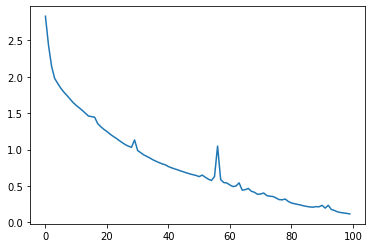

In [32]:
plt.plot(model.history.history['loss'])
plt.show

In [33]:
import time
trainPredict = model.predict(x_train)

start = time.time()
testPredict = model.predict(x_test)
end = time.time()
total = end-start

print(total)

0.0679616928100586


In [34]:
testPredict2 = scaler.inverse_transform(testPredict) 

In [35]:
y_test2 = scaler.inverse_transform([y_test])

In [36]:
mse = 0
for i in range(len(testPredict2)):
    mse = mse+(testPredict2[i]-y_test2[0][i])**2
mse = mse/len(y_test2[0])
mse

array([96.540146], dtype=float32)

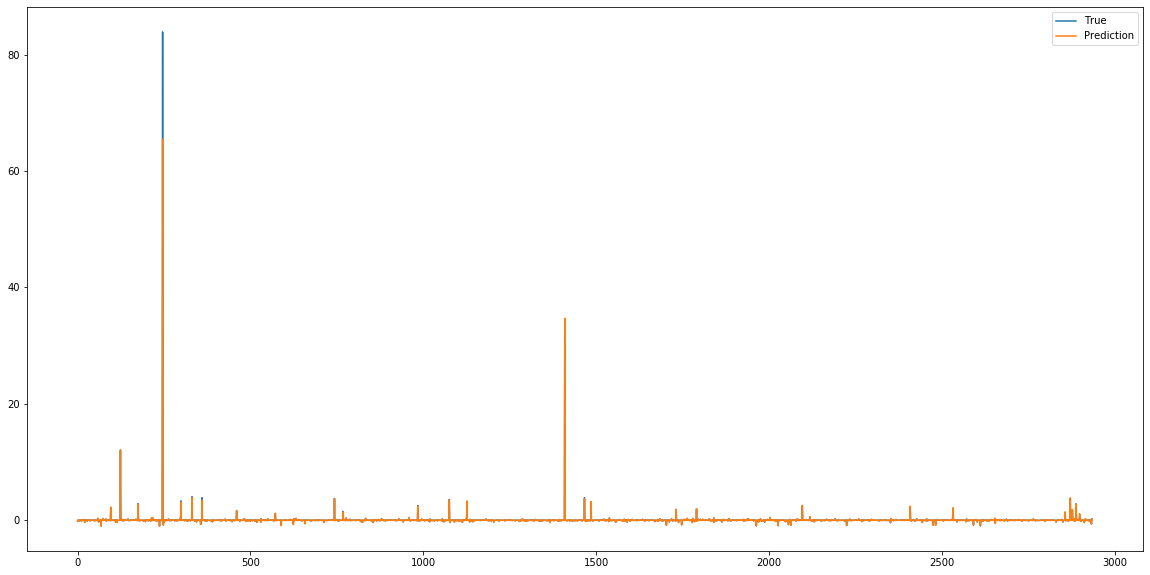

In [37]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_train, label='True')
ax.plot(trainPredict, label='Prediction')
ax.legend()
plt.show()

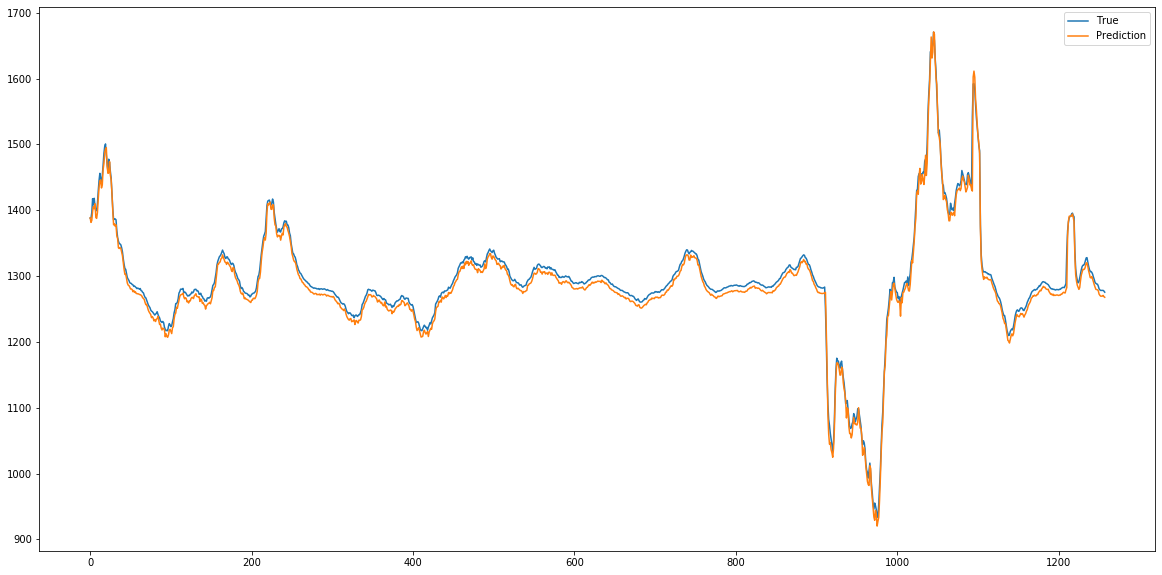

In [38]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test2[0], label='True')
ax.plot(testPredict2, label='Prediction')
ax.legend()
plt.show()